In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas.api.types import CategoricalDtype

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style()

from scipy import stats, linalg

In [7]:
df = pd.read_csv('../dados/kc_house_data_br.csv', sep = ',')
df.head(1)

,registro,data,BRL,quartos,banheiros,casa_m²,lote_m²,nº_pavtos,frente_mar,visao,condicao,padrao,subsolo_m²,construcao,reforma,lat,log
0,7129300520,2014-10-13,1164975.0,3,1,1180,5650,1,0,0,3,7,0,1955,0,47.5112,-122.257


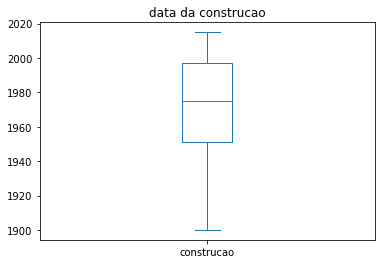

In [8]:
df[['construcao']].plot(kind='box')
plt.title('data da construcao')
plt.show()

<AxesSubplot:xlabel='construcao', ylabel='BRL'>

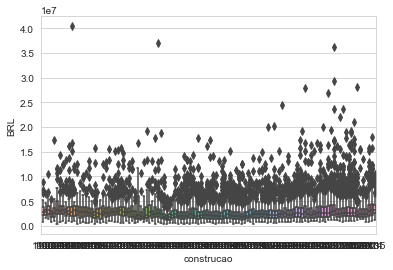

In [9]:
sns.set_style("whitegrid")
sns.boxplot(x = 'construcao', y = 'BRL', data = df)

In [10]:
ano_de_construcao = [1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,
 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000]

In [17]:
selecao = df['construcao'].isin(ano_de_construcao)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: construcao, Length: 21613, dtype: bool

In [19]:
df_new = df[selecao]

In [20]:
df_new

,registro,data,BRL,quartos,banheiros,casa_m²,lote_m²,nº_pavtos,frente_mar,visao,condicao,padrao,subsolo_m²,construcao,reforma,lat,log
0,7129300520,2014-10-13,1164975.0,3,1,1180,5650,1,0,0,3,7,0,1955,0,47.5112,-122.257
1,6414100192,2014-12-09,2824500.0,3,3,2570,7242,2,0,0,3,7,400,1951,1991,47.7210,-122.319
3,2487200875,2014-12-09,3171000.0,4,3,1960,5000,1,0,0,5,7,910,1965,0,47.5208,-122.393
4,1954400510,2015-02-18,2677500.0,3,2,1680,8080,1,0,0,3,8,0,1987,0,47.6168,-122.045
6,1321400060,2014-06-27,1351875.0,3,3,1715,6819,2,0,0,3,7,0,1995,0,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,3449000010,2015-03-12,1546492.5,3,1,1140,8400,1,0,0,4,7,0,1960,0,47.5022,-122.144
21085,4449800480,2015-03-18,3558397.5,6,3,2800,4213,2,0,0,3,8,0,1998,0,47.6892,-122.389
21248,2911700010,2015-03-03,5670000.0,3,3,2240,21477,2,0,2,3,8,0,1995,0,47.5745,-122.180
21303,522059130,2015-04-29,2441250.0,3,1,1150,18200,1,0,0,5,7,0,1959,0,47.4262,-122.187


In [21]:
df_new.shape[0]

12135

In [22]:
df_new.index = range(df_new.shape[0])

In [23]:
df_new.head(50)

,registro,data,BRL,quartos,banheiros,casa_m²,lote_m²,nº_pavtos,frente_mar,visao,condicao,padrao,subsolo_m²,construcao,reforma,lat,log
0,7129300520,2014-10-13,1164975.0,3,1,1180,5650,1,0,0,3,7,0,1955,0,47.5112,-122.257
1,6414100192,2014-12-09,2824500.0,3,3,2570,7242,2,0,0,3,7,400,1951,1991,47.7210,-122.319
2,2487200875,2014-12-09,3171000.0,4,3,1960,5000,1,0,0,5,7,910,1965,0,47.5208,-122.393
3,1954400510,2015-02-18,2677500.0,3,2,1680,8080,1,0,0,3,8,0,1987,0,47.6168,-122.045
4,1321400060,2014-06-27,1351875.0,3,3,1715,6819,2,0,0,3,7,0,1995,0,47.3097,-122.327
5,2008000270,2015-01-15,1532212.5,3,2,1060,9711,1,0,0,3,7,0,1963,0,47.4095,-122.315
6,2414600126,2015-04-15,1204875.0,3,1,1780,7470,1,0,0,3,7,730,1960,0,47.5123,-122.337
7,1736800520,2015-04-03,3478125.0,3,3,3560,9796,1,0,0,3,8,1700,1965,0,47.6007,-122.145
8,6054650070,2014-10-07,2100000.0,3,2,1370,9680,1,0,0,4,7,0,1977,0,47.6127,-122.045
9,9297300055,2015-01-24,3412500.0,4,3,2950,5000,2,0,3,3,9,970,1979,0,47.5714,-122.375


In [24]:
df_new.to_csv('../dados/kc_br_DEC_1950_2000.csv', sep = ';', index = False)